<a href="https://colab.research.google.com/github/mayankjain281/Project_6_Delhivery/blob/main/Project_6_Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business Problem Statement

The company wants to understand and process the data coming out of data engineering pipelines:
Clean, sanitize and manipulate data to get useful features out of raw fields
Make sense out of the raw data and help the data science team to build forecasting models on it.


The aim is to find is there significant differences among variables like expected delivery time and actual dilivery time. It crucial for business because if the algorithm that predicts time is not working correctly, then customers will get wrong estimation and if the customers will not get delivery on time then, they will be unsetisfied and raise customer service complaints. That may lead to increase operational overload, decrease revenue, decrease company reputation.

### Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/delhivery_data.txt')

In [ ]:
pd.set_option('max_columns',100)
pd.set_option('min_rows', 8)
df

# osrm time = estimated travel time (check points cumulative sum till hub/segment)
# actual time = actual travel time (check points cumulative till hub/segment)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,72,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,False,70,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


In [ ]:
df.shape
# 144867 rows, 24 columns

(144867, 24)

In [ ]:
# Drop unnecessary/Unknown field columns
unknown = df.iloc[:,df.columns.str.contains('factor|cutoff')].columns
for i in unknown:
  df.drop(i,axis=1,inplace=True)

In [ ]:
df_na = pd.DataFrame(df.isna().sum())
df_na['percent'] = df.isna().sum() *100/len(df)
df_na['percent'] = df_na['percent'].round(3)
df_na
# Minor rows with missing value, we can drop those rows.

,0,percent
data,0,0.000
trip_creation_time,0,0.000
route_schedule_uuid,0,0.000
route_type,0,0.000
trip_uuid,0,0.000
source_center,0,0.000
source_name,293,0.202
destination_center,0,0.000
destination_name,261,0.180
od_start_time,0,0.000


In [ ]:
df.dropna(how='any', inplace=True)
# removed rows with null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  actual_distance_

In [ ]:
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
# Converting the data type of columns to appropriate data type

In [ ]:
df.nunique()
# Only few columns are categorical, mostly data is numeric

data                                   2
trip_creation_time                 14787
route_schedule_uuid                 1497
route_type                             2
trip_uuid                          14787
source_center                       1496
source_name                         1496
destination_center                  1466
destination_name                    1466
od_start_time                      26223
od_end_time                        26223
start_scan_to_end_scan              1914
actual_distance_to_destination    143965
actual_time                         3182
osrm_time                           1531
osrm_distance                     137544
segment_actual_time                  746
segment_osrm_time                    214
segment_osrm_distance             113497
dtype: int64

In [ ]:
#Checking how the data is spread in categoric columns
df2=df.copy()
df2
categ_cols = ['route_type']
cat_count = df2[categ_cols].melt().groupby(['variable', 'value'])[['value']].size().reset_index(name='counts')
s = df2[categ_cols].melt().variable.value_counts()
cat_count['Percent'] = cat_count['counts'].div(cat_count['variable'].map(s)).mul(100).round().astype('int')
cat_count.groupby(['variable', 'value']).first()
# FTL Transportation used 69%
# Carting Transportation 31%

counts  Percent
variable   value                   
route_type Carting   45184       31
           FTL       99132       69

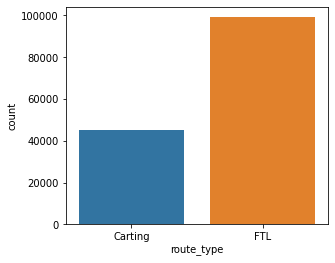

In [ ]:
plt.figure(figsize = [16,4])
cat_cols = ['route_type']
for i in range (len(cat_cols)):
  plt.subplot(1, 3, i+1)
  sns.countplot(data=df, x=cat_cols[i])

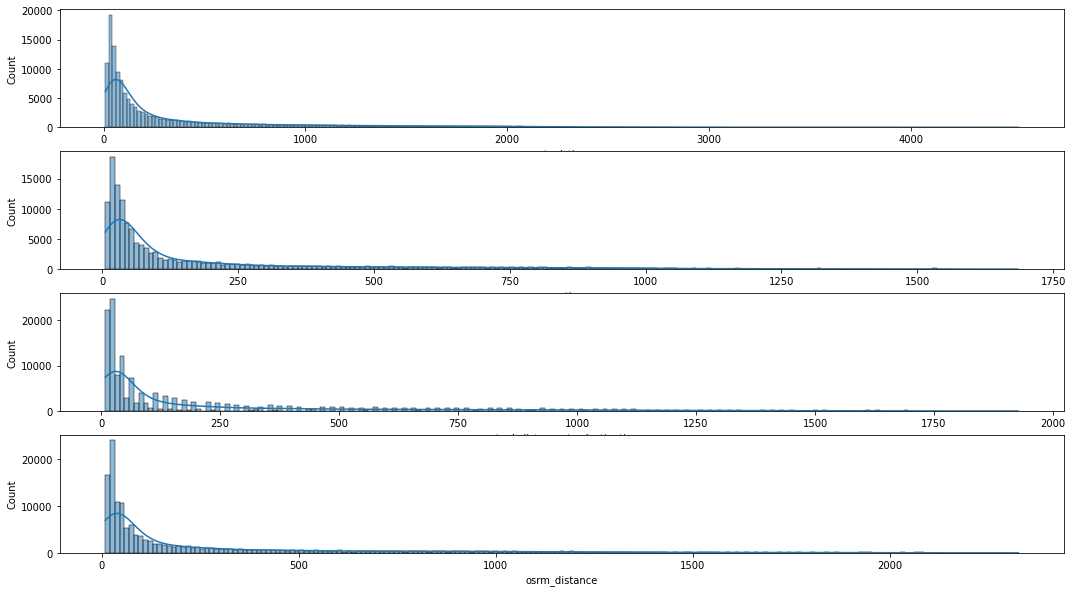

In [ ]:
plt.figure(figsize = [18,10])
num_cols = ['actual_time','osrm_time','actual_distance_to_destination','osrm_distance']
for i in range (len(num_cols)):
  plt.subplot(len(num_cols),1, i+1)
  sns.histplot(data=df, x=num_cols[i], kde=True)

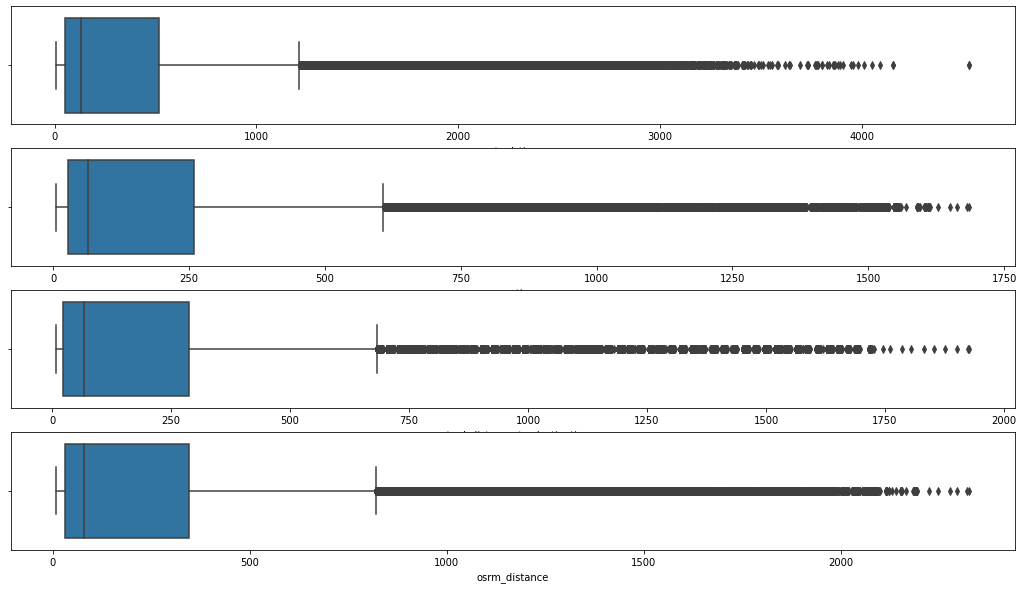

In [ ]:
plt.figure(figsize = [18,10])
num_cols = ['actual_time','osrm_time','actual_distance_to_destination','osrm_distance']
for i in range (len(num_cols)):
  plt.subplot(len(num_cols),1, i+1)
  sns.boxplot(data=df, x=num_cols[i])

In [ ]:
df.describe()

# Data contains extreame outliers
# Variables showing are highly right skew distribution
# segment_actual_time showing negetive value that not making sense
# Data cleaning is needed
# Data contains similer segment vaulues, need to group them

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
count,130868.000000,130868.000000,130868.000000,130868.000000,130868.000000,130868.000000,130868.000000,130868.000000,130868.000000,130868.000000,130868.000000
mean,941.958057,231.120919,404.065012,209.825603,279.976641,28.430319,16.253064,20.489674,399.956980,309.840768,237.278074
std,1031.953320,342.810982,591.574488,305.929392,418.394128,14.474752,7.797622,9.914124,585.479706,472.363740,354.708491
min,20.000000,9.000045,9.000000,6.000000,9.008200,-7.000000,0.000000,0.000000,9.000000,9.008200,6.000000
25%,151.000000,23.124073,48.000000,26.000000,28.792675,18.000000,10.000000,11.578350,47.000000,29.197850,26.000000
50%,426.000000,63.811633,119.000000,61.000000,75.009050,27.000000,17.000000,23.050150,117.000000,77.055600,64.000000
75%,1597.000000,286.273519,488.000000,251.000000,335.047625,36.000000,21.000000,26.692150,483.000000,370.005275,286.000000
max,4535.000000,1924.221719,4532.000000,1682.000000,2319.934400,70.000000,38.000000,58.227000,4504.000000,2640.924700,1938.000000


### groupby and aggregations

In [ ]:
# Grouping the data at journey level, Creating data with unique index value as segment_key.
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
segment_cols = ['segment_actual_time','segment_osrm_distance','segment_osrm_time']
for col in segment_cols:
  df[col+'_sum'] = df.groupby('segment_key')[col].cumsum()
df[[col + '_sum' for col in segment_cols]].head()

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0


In [ ]:
# Aggregating at sub-journey level
create_segment_dict = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',

    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum'
}

In [ ]:
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'],ascending=True).reset_index()

### feature cration and merging of rows

In [ ]:
# Feature creation: Calculating time taken between od_start_time and od_end_time, keep it as feature.
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds()/60

In [ ]:
segment
# od_time_diff_hour is matching with start_scan_to_end_scan

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,3464.0,4540.1261,6434.0,6343.4400,5032.0,1260.604421
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,4323.0,6037.6386,9082.0,7878.6704,5638.0,999.505379
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,55.0,60.3157,95.0,60.3159,55.0,58.832388
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,155.0,209.1151,301.0,208.1935,144.0,122.779486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,108.0,111.8555,172.0,164.2574,144.0,91.087797
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,22.0,25.5371,50.0,25.5370,22.0,44.174403
26220,26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,59.0,76.5169,278.0,76.5169,59.0,287.474007
26221,26221,trip-153861118270144424IND583201AAAIND583119AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,66.0,25.534793,42.0,47.0,51.2851,71.0,51.2851,46.0,66.933565


In [ ]:
segment.nunique()
#now we have the data without duplicates, means we have unique value for ever row as segment_key.

index                             26222
segment_key                       26222
data                                  2
trip_creation_time                14787
route_schedule_uuid                1497
route_type                            2
trip_uuid                         14787
source_center                      1496
source_name                        1496
destination_center                 1466
destination_name                   1466
od_start_time                     26222
od_end_time                       26222
start_scan_to_end_scan             1914
actual_distance_to_destination    26193
actual_time                        1657
osrm_time                          2723
osrm_distance                     26089
segment_actual_time_sum            3839
segment_osrm_distance_sum         26102
segment_osrm_time_sum              2964
od_time_diff_hour                 26222
dtype: int64

In [ ]:
create_trip_dict = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum'
}

In [ ]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,1562.0,7787.0,10577.7647,15516.0,14222.1104,10670.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,143.0,210.0,269.4308,396.0,268.5094,199.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,1927.404273,3347.0,65768.0,89447.2488,110876.0,90479.7151,70971.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,24.0,31.6475,82.0,31.8441,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,15.513784,21.0,19.0,26.5333,33.0,26.5334,18.0
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,38.684839,282.0,134.0,162.8499,548.0,249.4333,202.0
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,134.723836,264.0,446.0,449.5383,592.0,520.5464,497.0
14786,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),353.0,66.081533,275.0,106.0,127.8020,349.0,127.8020,105.0


## Outlier treatment

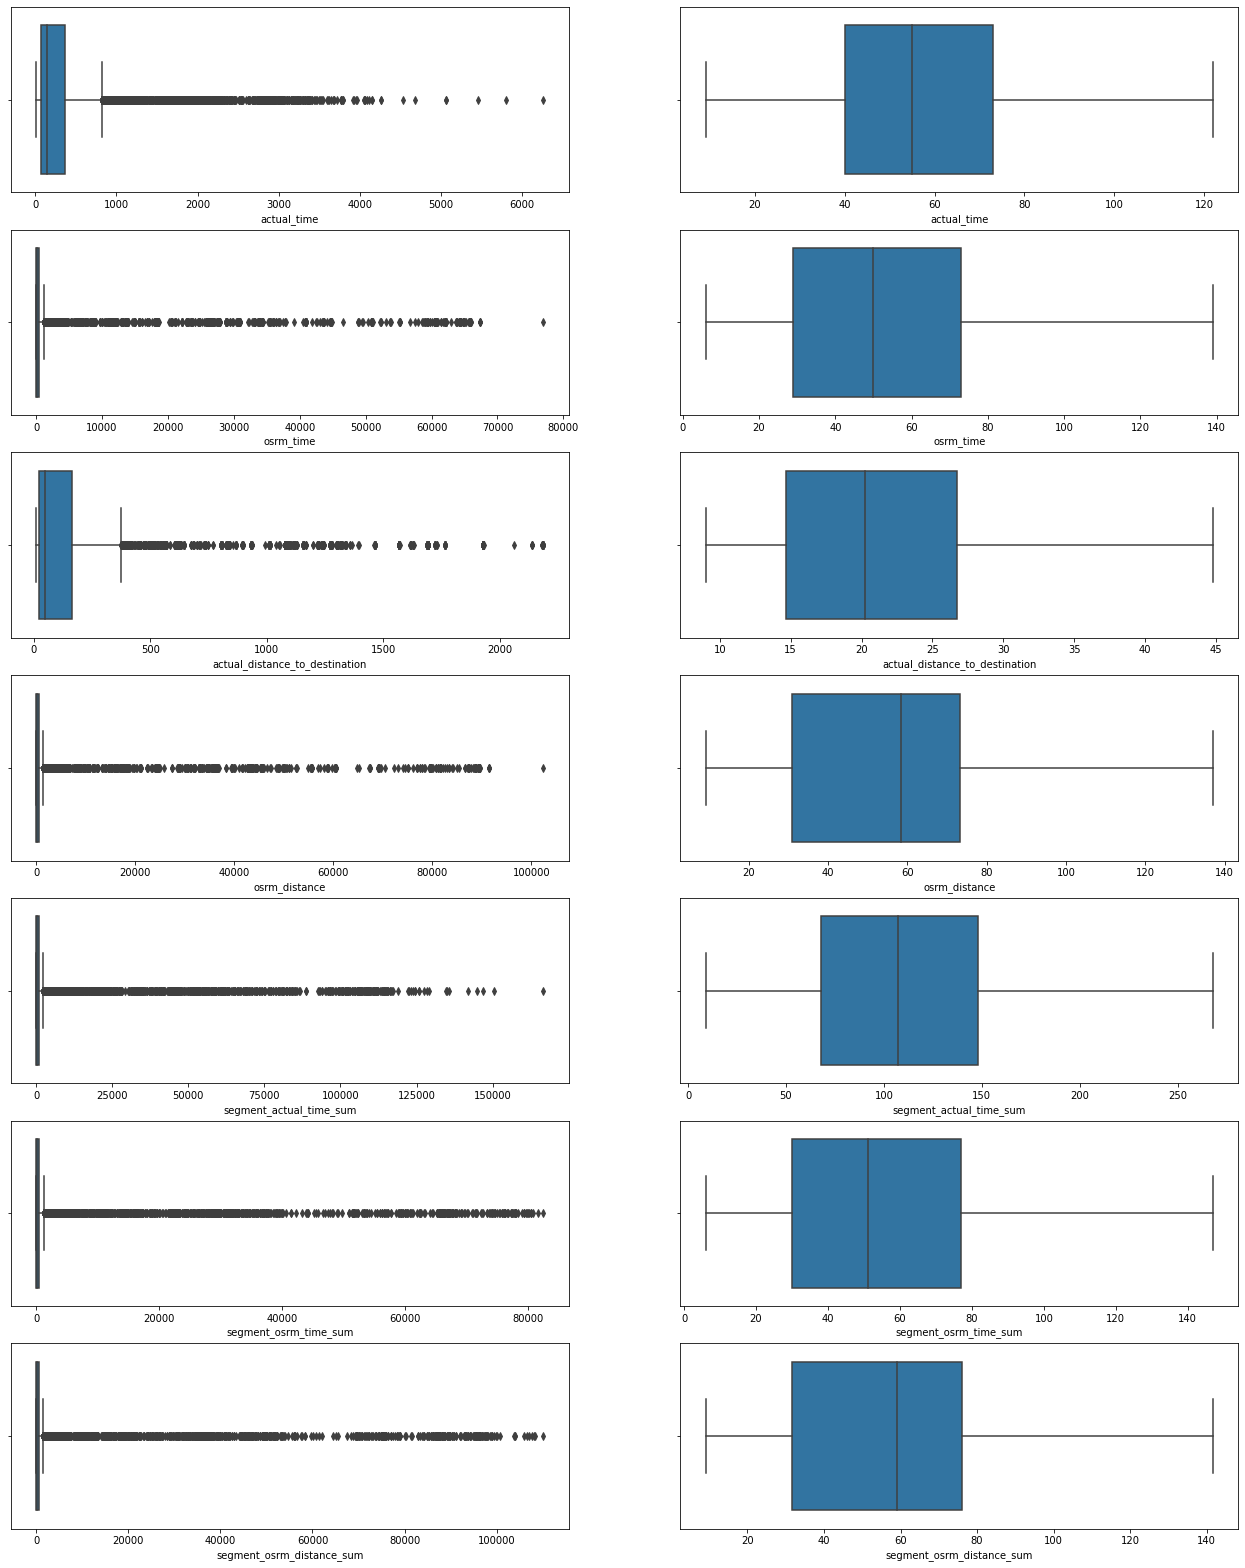

In [ ]:
trip_o = trip.copy()

def find_outliers_IQR(col):
  q1=col.quantile(0.25)
  q3=col.quantile(0.75)
  IQR=q3-q1
  outliers = trip[((col<(q1-1.5*IQR)) | (col>(q3+1.5*IQR)))]
  return outliers

cols = ['actual_time', 'osrm_time','actual_distance_to_destination','osrm_distance','segment_actual_time_sum','segment_osrm_time_sum','segment_osrm_distance_sum']

n=1
while n!=0:
  n=0
  for x in cols:
    outliers = find_outliers_IQR(trip[x]).index
    trip.drop(outliers,inplace=True)
    n+=len(outliers)
    

fig, axis = plt.subplots(nrows=len(cols), ncols=2, figsize=(22, len(cols)*4))
for i in range (len(cols)):
  for j in ([0,1]):
    if j==0:
      sns.boxplot(data=trip_o, x=cols[i], ax=axis[i, j])
    else:
      sns.boxplot(data=trip, x=cols[i], ax=axis[i, j])
# Left side plots: boxplot distribution before removing outliers
# Right side plots: boxplot distribution after removing outliers

In [ ]:
trip_o.describe()
# before outlier treatment there was high difference between median and mean values.

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
count,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000
mean,529.429025,164.090196,356.306012,2092.831406,2786.867034,4038.942449,3094.369884,2375.041793
std,658.254936,305.502982,561.517936,7964.769556,10769.741065,15076.443642,12158.617614,9231.485173
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,9.072900,6.000000
25%,149.000000,22.777099,67.000000,61.000000,65.635550,140.000000,67.424450,63.000000
50%,279.000000,48.287894,148.000000,167.000000,172.886300,342.000000,183.331800,176.000000
75%,632.000000,163.591258,367.000000,510.500000,603.955400,1050.000000,630.772900,550.000000
max,7898.000000,2186.531787,6265.000000,76953.000000,102415.868000,166655.000000,110118.392200,82478.000000


In [ ]:
trip.describe()
# after outlier treatment there the mean values is closer to median.

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
count,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000
mean,155.022481,20.817280,57.434690,54.112209,57.274155,111.931202,59.306743,55.974806
std,121.042528,8.006889,23.920582,29.317440,29.436978,54.481461,30.996312,31.131111
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,9.072900,6.000000
25%,89.000000,14.641301,40.000000,29.000000,30.853800,68.000000,31.738300,30.000000
50%,127.000000,20.266599,55.000000,50.000000,58.327150,107.000000,59.146250,51.000000
75%,182.000000,26.713161,73.000000,73.000000,73.351800,148.000000,76.117275,77.000000
max,2701.000000,44.794445,122.000000,139.000000,137.075200,268.000000,141.654700,147.000000


In [ ]:
len(trip_o),len(trip)

(14787, 5160)

## Hypothesis testing Comparisons

In [ ]:
# hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

# Checking: Does segment_actual_time is similer as segment_osrm_time?

from scipy.stats import ttest_ind
null_hypothesis = 'mean of actual_time is not higher than mean of osrm_time'    
alternative_hypothesis = 'mean of actual_time is higher than mean of osrm_time'  

sample1 = trip['actual_time']
sample2 = trip['osrm_time']
t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, alternative='greater')
print(t_stat, p_value)

if(p_value < 0.05):
  print('Since, p-value < 0.05, the null hypothesis is rejected')
  print(alternative_hypothesis)
else:
  print('Since p-value > 0.05, we fail to reject null hypothesis')
  print(null_hypothesis)

# conclusion: mean of actual_time is higher than mean of osrm_time

6.307544212335001 1.4779513885349015e-10
Since, p-value < 0.05, the null hypothesis is rejected
mean of actual_time is higher than mean of osrm_time


In [ ]:
# hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value

# Checking: Does actual_time is similer as segment_osrm_time?

from scipy.stats import ttest_ind
null_hypothesis = 'mean of actual_time is similer as segment_actual_time'    
alternative_hypothesis = 'mean of actual_time is different than mean of segment_osrm_time'  

sample1 = trip['actual_time']
sample2 = trip['segment_actual_time_sum']
t_stat, p_value = ttest_ind(sample1, sample2)
print(t_stat, p_value)

if(p_value < 0.05):
  print('Since, p-value < 0.05, the null hypothesis is rejected')
  print(alternative_hypothesis)
else:
  print('Since p-value > 0.05, we fail to reject null hypothesis')
  print(null_hypothesis)

# conclusion: mean of actual_time is different than mean of segment_osrm_time

-65.79091499324902 0.0
Since, p-value < 0.05, the null hypothesis is rejected
mean of actual_time is different than mean of segment_osrm_time


In [ ]:
# Checking: Does osrm_distance is similer as segment_osrm_distance_sum?

from scipy.stats import ttest_ind
null_hypothesis = 'mean of osrm_distance is similer as mean of segment_osrm_distance_sum'    
alternative_hypothesis = 'mean of osrm_distance is higher than mean of segment_osrm_distance_sum'  

sample1 = trip['osrm_distance']
sample2 = trip['segment_osrm_distance_sum']
t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, alternative='greater')
print(t_stat, p_value)

if(p_value < 0.05):
  print('Since, p-value < 0.05, the null hypothesis is rejected')
  print(alternative_hypothesis)
else:
  print('Since p-value > 0.05, we fail to reject null hypothesis')
  print(null_hypothesis)

# conclusion: mean of osrm_distance is similer as mean of segment_osrm_distance_sum

-3.4156110488999936 0.9996805751383507
Since p-value > 0.05, we fail to reject null hypothesis
mean of osrm_distance is similer as mean of segment_osrm_distance_sum


In [ ]:
num_cols = ['actual_time','osrm_time','segment_actual_time_sum','segment_osrm_time_sum','actual_distance_to_destination','osrm_distance','segment_osrm_distance_sum']
for i in (num_cols):
  stat, p_value = stats.shapiro(sample1)
  if(p_value < 0.05):
    print(i, ": sample is not normally distributed, do non parametric test")
  else:
    print(i, ": sample is normally distributed, can do parametric test")

actual_time : sample is not normally distributed, do non parametric test
osrm_time : sample is not normally distributed, do non parametric test
segment_actual_time_sum : sample is not normally distributed, do non parametric test
segment_osrm_time_sum : sample is not normally distributed, do non parametric test
actual_distance_to_destination : sample is not normally distributed, do non parametric test
osrm_distance : sample is not normally distributed, do non parametric test
segment_osrm_distance_sum : sample is not normally distributed, do non parametric test


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


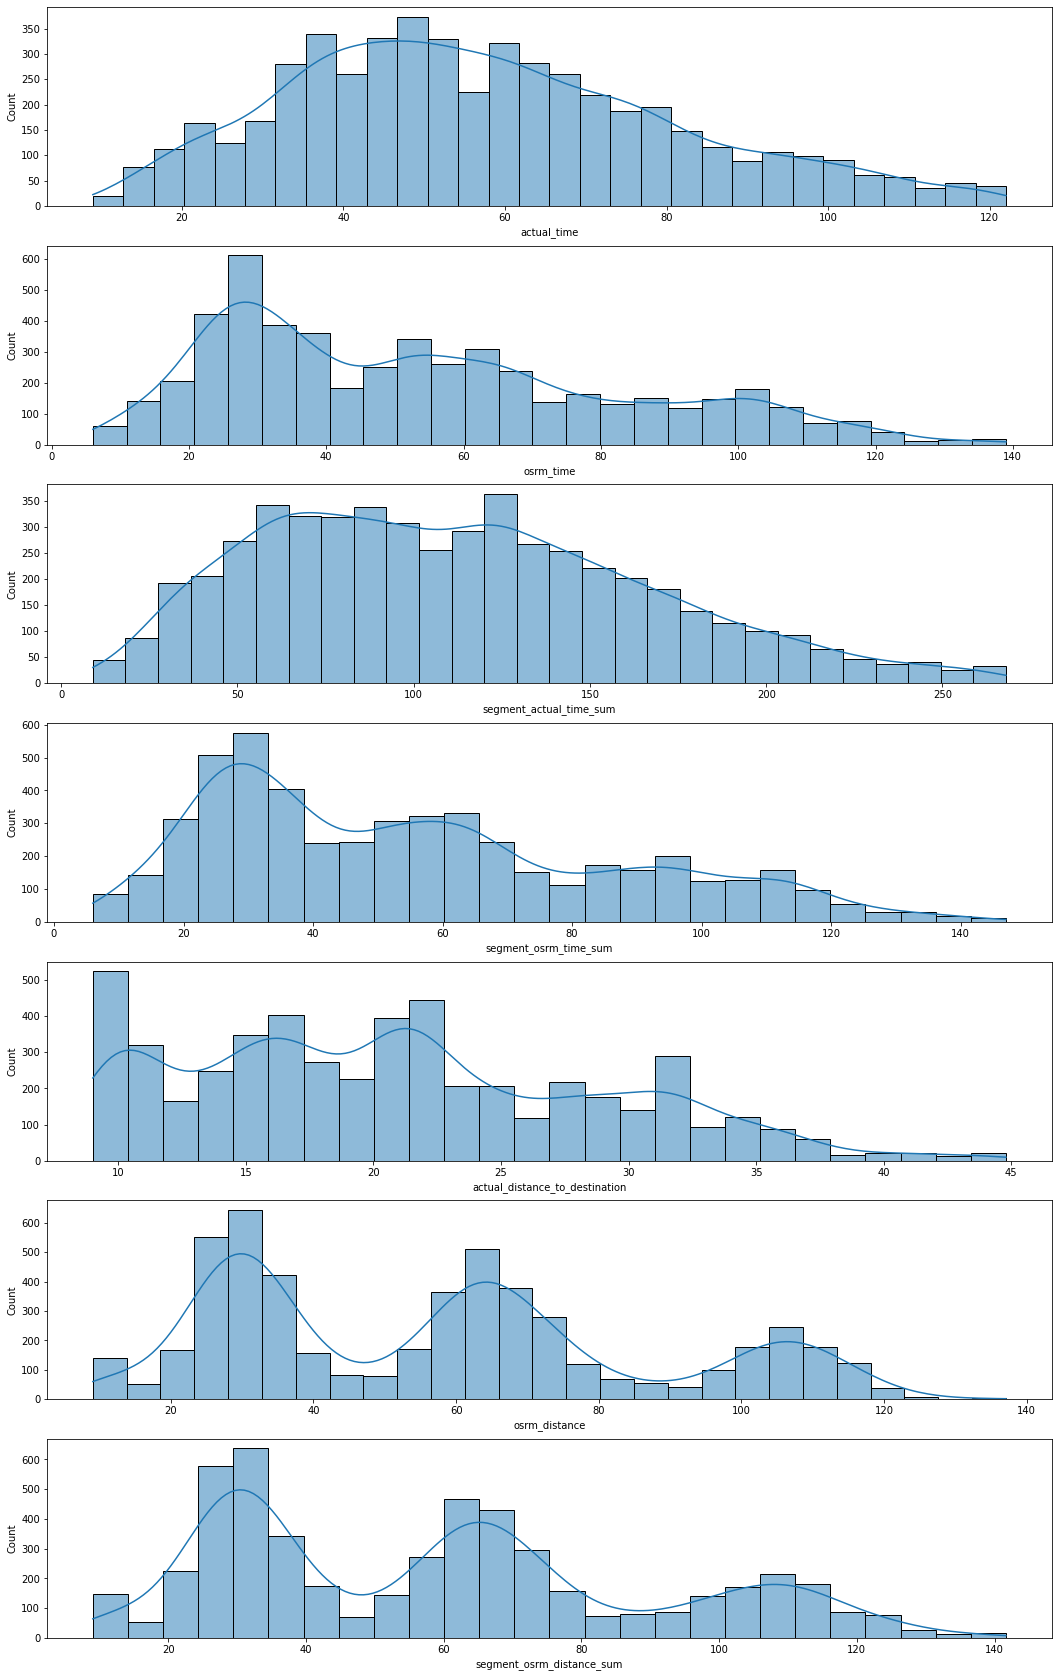

In [ ]:
plt.figure(figsize = [18,30])
num_cols = ['actual_time','osrm_time','segment_actual_time_sum','segment_osrm_time_sum','actual_distance_to_destination','osrm_distance','segment_osrm_distance_sum']
for i in range (len(num_cols)):
  plt.subplot(len(num_cols),1, i+1)
  sns.histplot(data=trip, x=num_cols[i], kde=True)
# Distribution are not normally distributed, we will do non parametric tests

In [ ]:
# H0: mean of both samples are similer
# Ha: means of both samples are different
from scipy.stats import mannwhitneyu

sample1 = trip['actual_time']
sample2 = trip['osrm_time']
# perform mann whitney test
stat, p_value = mannwhitneyu(sample1, sample2)
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=14829121.00, p=0.00
Reject Null Hypothesis (Significant difference between two samples)


In [ ]:
# H0: mean of both samples are similer
# Ha: means of both samples are different
from scipy.stats import mannwhitneyu

sample1 = trip['osrm_distance']
sample2 = trip['segment_osrm_distance_sum']
# perform mann whitney test
stat, p_value = mannwhitneyu(sample1, sample2)
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=12813705.50, p=0.00
Reject Null Hypothesis (Significant difference between two samples)


## Standardization, Normalization 

In [ ]:
df_ao = trip[["actual_time", "osrm_time"]]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df_ao_ss = StandardScaler().fit_transform(df_ao) # ss--> standard scaler z-score

In [ ]:
df_ao_ss = pd.DataFrame(df_ao_ss, columns=["actual_time", "osrm_time"])

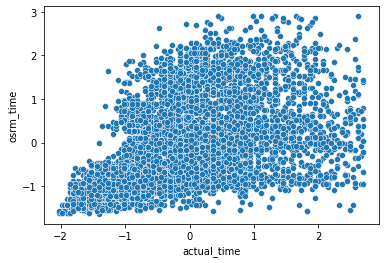

In [ ]:
sns.scatterplot(x=df_ao_ss["actual_time"], y=df_ao_ss["osrm_time"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


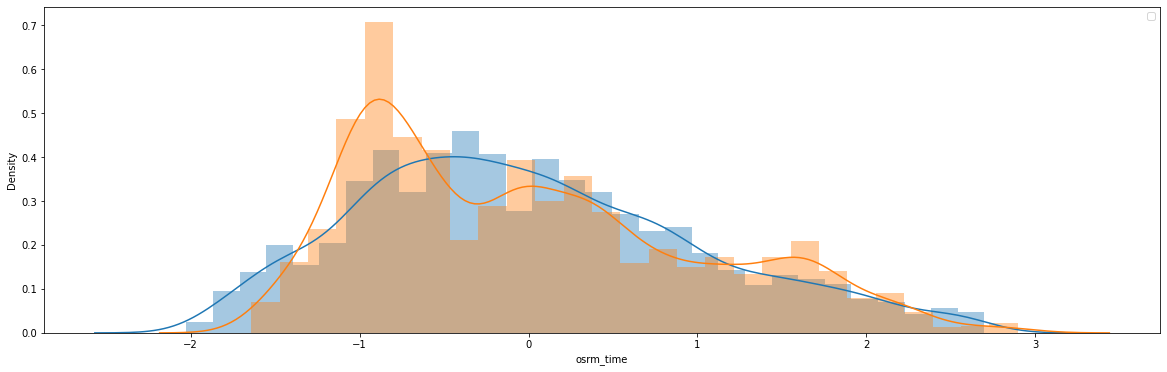

In [ ]:
plt.figure(figsize = (20,6))

sns.distplot(df_ao_ss['actual_time'])
sns.distplot(df_ao_ss['osrm_time'])

plt.legend()
plt.show()

In [ ]:
# hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

# Checking: Does segment_actual_time is similer as segment_osrm_time?

from scipy.stats import ttest_ind
null_hypothesis = 'mean of actual_time is similer to osrm_time'    
alternative_hypothesis = 'mean of actual_time is different than osrm_time'  

sample1 = df_ao_ss['actual_time']
sample2 = df_ao_ss['osrm_time']
t_stat, p_value = ttest_ind(sample1, sample2)
print(t_stat, p_value)

if(p_value < 0.05):
  print('Since, p-value < 0.05, the null hypothesis is rejected')
  print(alternative_hypothesis)
else:
  print('Since p-value > 0.05, we fail to reject null hypothesis')
  print(null_hypothesis)

# conclusion: mean of actual_time is similer to osrm_time (with following the standardization approach)

-4.301138070642346e-15 0.9999999999999966
Since p-value > 0.05, we fail to reject null hypothesis
mean of actual_time is similer to osrm_time


In [ ]:
df_ao_ss.mean()

actual_time   -8.950635e-17
osrm_time     -4.819573e-18
dtype: float64

In [ ]:
df_ao_mm.mean()

actual_time    0.428626
osrm_time      0.361746
dtype: float64

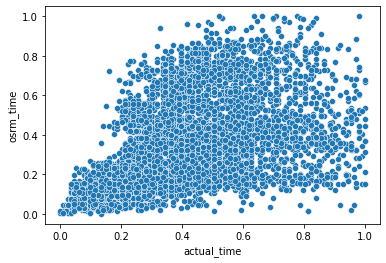

In [ ]:
df_ao_mm = MinMaxScaler().fit_transform(df_ao)
df_ao_mm = pd.DataFrame(df_ao_mm, columns=["actual_time", "osrm_time"])
sns.scatterplot(x=df_ao_mm["actual_time"], y=df_ao_mm["osrm_time"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


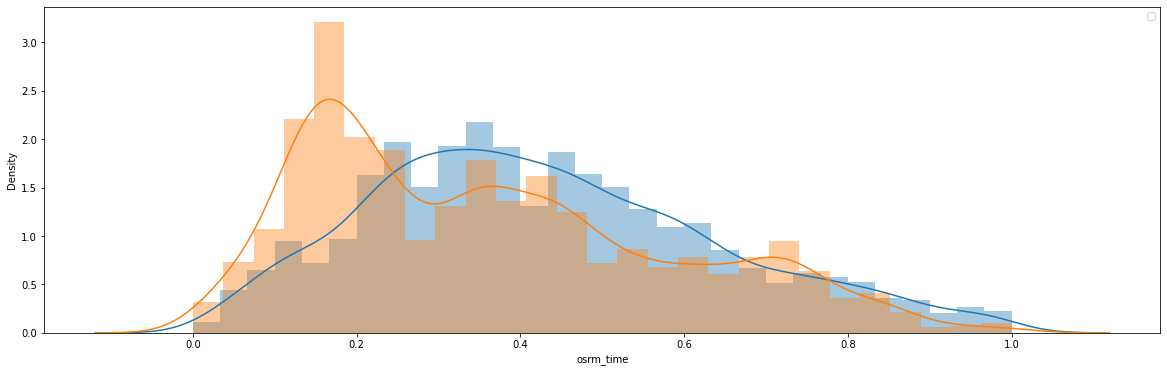

In [ ]:
plt.figure(figsize = (20,6))

sns.distplot(df_ao_mm['actual_time'])
sns.distplot(df_ao_mm['osrm_time'])

plt.legend()
plt.show()

## Handling categorical values

In [ ]:
trip.nunique()

data                                 2
trip_creation_time                5160
route_schedule_uuid                746
route_type                           2
trip_uuid                         5160
source_center                      396
source_name                        396
destination_center                 415
destination_name                   415
start_scan_to_end_scan             500
actual_distance_to_destination    5151
actual_time                        114
osrm_time                          134
osrm_distance                     5140
segment_actual_time_sum            260
segment_osrm_distance_sum         5142
segment_osrm_time_sum              141
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
trip[col] = label_encoder.fit_transform(trip['route_type'])
trip[col].value_counts()

0    4907
1     253
Name: route_type, dtype: int64

In [ ]:
trip['data'].value_counts()

training    3599
test        1561
Name: data, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
trip[col] = label_encoder.fit_transform(trip['data'])
trip[col].value_counts()

1    3599
0    1561
Name: route_type, dtype: int64

## Handling missing values

In [ ]:
from sklearn.impute import SimpleImputer
dm = pd.read_csv('/content/delhivery_data.txt')
dm.head(3)

# Because data contains very few missing values, so we removed them.
# If we would get data with many missing value, then we would imputation approach:

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714


In [ ]:
dm.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
dm['source_name']  = SimpleImputer(strategy="most_frequent").fit_transform(dm[['source_name']])

In [ ]:
dm['destination_name'] = SimpleImputer(strategy="most_frequent").fit_transform(dm[['destination_name']])

In [ ]:
dm.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

## Columns split

In [ ]:
ds = trip[['destination_name']].copy()

new = trip['source_name'].str.split(" ", n = 1, expand = True)
ds['source_city']= new[0]
ds['source_state']= new[1].str[1:-1]

new = trip['destination_name'].str.split(" ", n = 1, expand = True)
ds['destination_city']= new[0]
ds['destination_state']= new[1].str[1:-1]

ds['Corridor'] = ds['source_city']+" To "+ds['destination_city']

ds

,destination_name,source_city,source_state,destination_city,destination_state,Corridor
3,Mumbai_MiraRd_IP (Maharashtra),Mumbai,ub (Maharashtra,Mumbai_MiraRd_IP,Maharashtra,Mumbai To Mumbai_MiraRd_IP
5,Chennai_Poonamallee (Tamil Nadu),Chennai_Poonamallee,Tamil Nadu,Chennai_Poonamallee,Tamil Nadu,Chennai_Poonamallee To Chennai_Poonamallee
6,Chennai_Vandalur_Dc (Tamil Nadu),Chennai_Chrompet_DPC,Tamil Nadu,Chennai_Vandalur_Dc,Tamil Nadu,Chennai_Chrompet_DPC To Chennai_Vandalur_Dc
7,HBR Layout PC (Karnataka),HBR,ayout PC (Karnataka,HBR,ayout PC (Karnataka,HBR To HBR
...,...,...,...,...,...,...
14779,Chennai_Thiruvlr_DC (Tamil Nadu),Chennai_Porur_DPC,Tamil Nadu,Chennai_Thiruvlr_DC,Tamil Nadu,Chennai_Porur_DPC To Chennai_Thiruvlr_DC
14780,Chennai_Sriperumbudur_Dc (Tamil Nadu),Chennai_Poonamallee,Tamil Nadu,Chennai_Sriperumbudur_Dc,Tamil Nadu,Chennai_Poonamallee To Chennai_Sriperumbudur_Dc
14781,Mumbai_MiraRd_IP (Maharashtra),Mumbai,ub (Maharashtra,Mumbai_MiraRd_IP,Maharashtra,Mumbai To Mumbai_MiraRd_IP
14783,Faridabad_Blbgarh_DC (Haryana),FBD_Balabhgarh_DPC,Haryana,Faridabad_Blbgarh_DC,Haryana,FBD_Balabhgarh_DPC To Faridabad_Blbgarh_DC


In [ ]:
ds['Corridor'].value_counts()
# There are 658 routes

Bhiwandi_Mankoli_HB To Mumbai                    100
Bangalore_Nelmngla_H To Bengaluru_KGAirprt_HB     87
Mumbai_Chndivli_PC To Bhiwandi_Mankoli_HB         77
Pune_Tathawde_H To PNQ                            75
                                                ... 
Delhi_Rohini_DPC To Delhi_Barwala                  1
Wardha_RamaNgr_D To Deoli_Central_DPP_2            1
Nadiad_DC To Nadiad_DC                             1
Janakpuri To Delhi_Nangli_IP                       1
Name: Corridor, Length: 658, dtype: int64

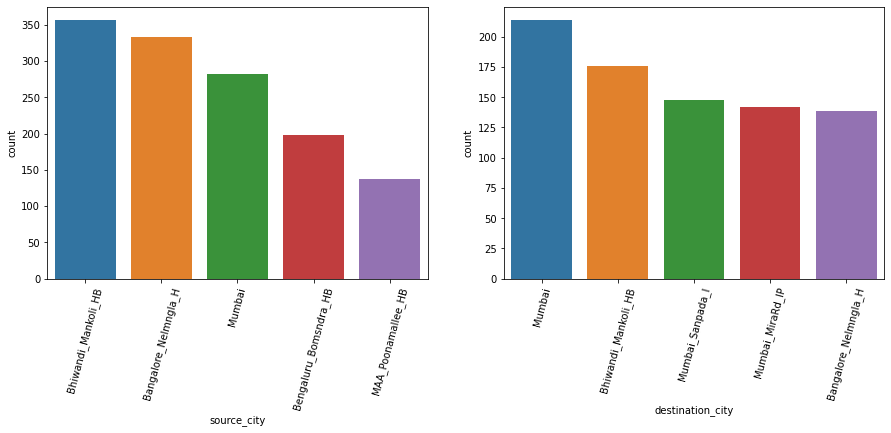

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data= ds, x='source_city', order=ds['source_city'].value_counts().nlargest(5).index)
plt.xticks(rotation = 75)

plt.subplot(1,2,2)
sns.countplot(data= ds, x='destination_city', order=ds['destination_city'].value_counts().nlargest(5).index)
plt.xticks(rotation = 75)
plt.show()

# most orders are coming from Bhindwandi_Mankoli_HB
# most orders are going to Mumbai
# Left plot: top 5 cities acting as source point
# right plot: top 5 cities acting as destination point

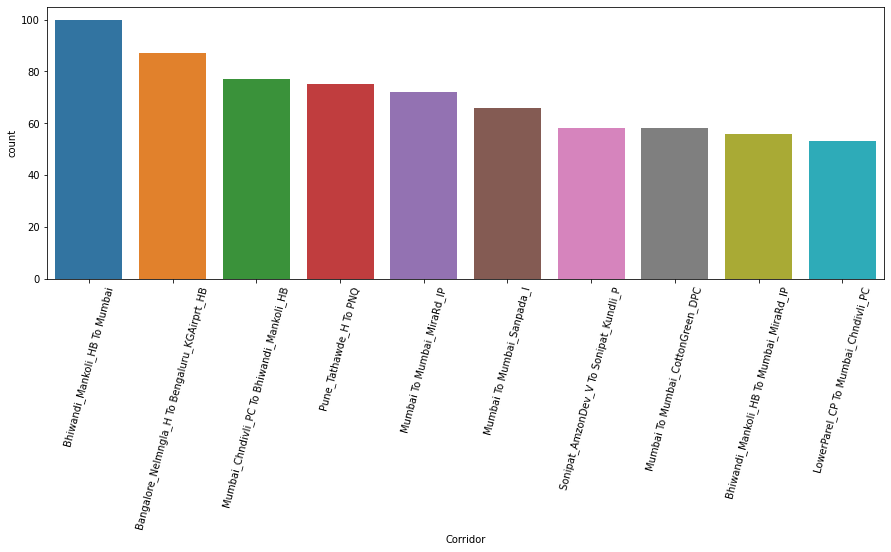

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data= ds, x='Corridor', order=ds['Corridor'].value_counts().nlargest(10).index)
plt.xticks(rotation = 75)
plt.show()

# the busiest route is Bhindwandi_Mankoli_HB to Mumbai
# Top 10 busiest routes

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

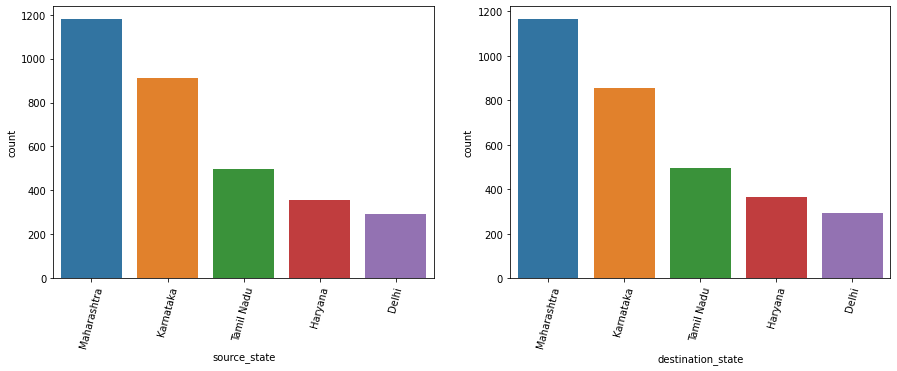

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(data= ds, x='source_state', order=ds['source_state'].value_counts().nlargest(5).index)
plt.xticks(rotation = 75)

plt.subplot(1,2,2)
sns.countplot(data= ds, x='destination_state', order=ds['destination_state'].value_counts().nlargest(5).index)
plt.xticks(rotation = 75)

# most orders are coming from Maharashtra state
# most orders are going to  Maharashtra state
# Left plot: top 5 cities acting as source point
# right plot: top 5 cities acting as destination point

In [ ]:
dn=pd.concat([trip,ds],axis=1)


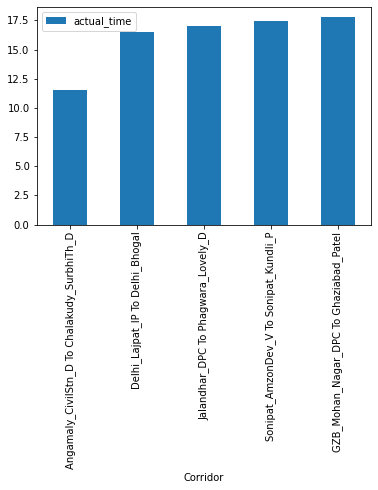

In [ ]:
dn.groupby('Corridor').agg({'actual_time':'mean'}).nsmallest(5,columns='actual_time').plot(kind='bar')
plt.show()

# trip between cities Angamaly to Chalakudy saw the least avg time for completion

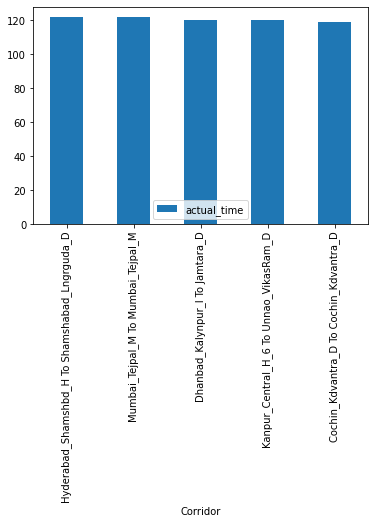

In [ ]:
dn.groupby('Corridor').agg({'actual_time':'mean'}).nlargest(5,columns='actual_time').plot(kind='bar')
plt.show()

# trip between cities Hyderabad to Shamshabad saw the highest avg time for completion

In [ ]:
ds.describe()
# 1179 orders are coming from state - Maharastra

,destination_name,source_city,source_state,destination_city,destination_state,Corridor
count,5160,5160,5160,5160,5160,5160
unique,415,391,42,411,44,658
top,Mumbai Hub (Maharashtra),Bhiwandi_Mankoli_HB,Maharashtra,Mumbai,Maharashtra,Bhiwandi_Mankoli_HB To Mumbai
freq,212,357,1179,214,1164,100


In [ ]:
dn.describe()
# Average actual time for a trip is 57 Hour

,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
count,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000
mean,0.697481,155.022481,20.817280,57.434690,54.112209,57.274155,111.931202,59.306743,55.974806
std,0.459393,121.042528,8.006889,23.920582,29.317440,29.436978,54.481461,30.996312,31.131111
min,0.000000,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,9.072900,6.000000
25%,0.000000,89.000000,14.641301,40.000000,29.000000,30.853800,68.000000,31.738300,30.000000
50%,1.000000,127.000000,20.266599,55.000000,50.000000,58.327150,107.000000,59.146250,51.000000
75%,1.000000,182.000000,26.713161,73.000000,73.000000,73.351800,148.000000,76.117275,77.000000
max,1.000000,2701.000000,44.794445,122.000000,139.000000,137.075200,268.000000,141.654700,147.000000


In [ ]:
trip_cr = df[['trip_creation_time']].copy()
trip_cr['trip_creation_time'] = pd.to_datetime(trip_cr['trip_creation_time'])
trip_cr['year'] = trip_cr['trip_creation_time'].dt.year
trip_cr['month'] = trip_cr['trip_creation_time'].dt.month
trip_cr['day'] = trip_cr['trip_creation_time'].dt.day
trip_cr
# Trip creation time variable is not making much sense

,trip_creation_time,year,month,day
0,2018-09-20 02:35:36.476840,2018,9,20
1,2018-09-20 02:35:36.476840,2018,9,20
2,2018-09-20 02:35:36.476840,2018,9,20
3,2018-09-20 02:35:36.476840,2018,9,20
...,...,...,...,...
144862,2018-09-20 16:24:28.436231,2018,9,20
144863,2018-09-20 16:24:28.436231,2018,9,20
144864,2018-09-20 16:24:28.436231,2018,9,20
144865,2018-09-20 16:24:28.436231,2018,9,20


In [ ]:
trip_cr['year'].value_counts()
# Data contains order from only 2018

2018    130868
Name: year, dtype: int64

In [ ]:
trip_cr['month'].value_counts()
# Data contains order from september and october month.

9     114979
10     15889
Name: month, dtype: int64

## Business Insights and Recommendations

In [ ]:
# mean of actual_time is higher than mean of osrm_time
# mean of actual_time is different than mean of segment_osrm_time
# mean of osrm_distance is similar as mean of segment_osrm_distance
# FTL Transportation used 69%
# Carting Transportation 31%
# There are 658 routes connecting sources to destinations
# most orders are coming from Bhindwandi_Mankoli_HB
# most orders are going to Mumbai
# the busiest route is Bhindwandi_Mankoli_HB to Mumbai
# company can use more transportation vehicles on this route
# most orders are coming from Maharashtra state
# most orders are going to  Maharashtra state
# trip between cities Angamaly to Chalakudy saw the least avg time for completion
# trip between cities Hyderabad to Shamshabad saw the highest avg time for completion
# variables showing highly right skew distribution we removed outliers and missing values
# By visualizing plots, we observed that there is not much difference between pair variable
# All the appropriate insights and recommendations are mentioned with relevant code and plots